# Transportation Data
### Source: World Data bank

#### Instructions:
In order to run this file, you must create a directory called '/data/transporation' and add these files (from google drive folder data -> transportation)
1. 'wrldbnk_trains.csv'
2. 'wrldbnk_planes.csv'


## Setup 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid
import os

DATA_DIR = 'data'
TRANSPORT_DIR = os.path.join(DATA_DIR, 'transportation')

SELECTED_COUNTRIES = [
'south africa',
'kenya',
'china',
'taiwan',
'japan',
'south korea',
'india',
'pakistan',
'indonesia',
'philippines',
'singapore',
'thailand',
'canada',
'united kingdom',
'ireland',
'scotland',
'australia',
'new zealand',
'united states',
'korea, rep.']

In [3]:
def load_data_frame(file_name, path):
    """
    Loads data from specified path and returns a data frame.
    """
    file_path = os.path.join(path, file_name)
    return pd.read_csv(file_path)

def clean_worldbank_data(df):
    """
    Removes extra columns that come from worldbank data files.
    Converts all values to numeric and lowercase.
    """
    #remove unneeded columns
    df.drop(['Indicator Name', 'Indicator Code', 'Country Code'], axis=1, inplace = True)

    #replace non-numericals
    df = df.replace('..', np.NaN)

    #convert all columns of DataFrame to numeric
    df.loc[:,1:] = df.iloc[:,1:].apply(pd.to_numeric)

    #convert country names to lowercase
    df['Country Name'] = df['Country Name'].str.lower()
    return df

def get_date_range(df, start_year, end_year_exclusive):
    """
    Returns a dataframe with the selected date range.
    """
    columns = df.columns
    country_index = columns.get_loc('Country Name') #make sure not to remove the country column
    start_index = columns.get_loc(start_year)
    end_index = columns.get_loc(end_year_exclusive)
    ranged_df = df.iloc[:,np.r_[country_index ,start_index : end_index]]
    return ranged_df

## Total Rail Lines

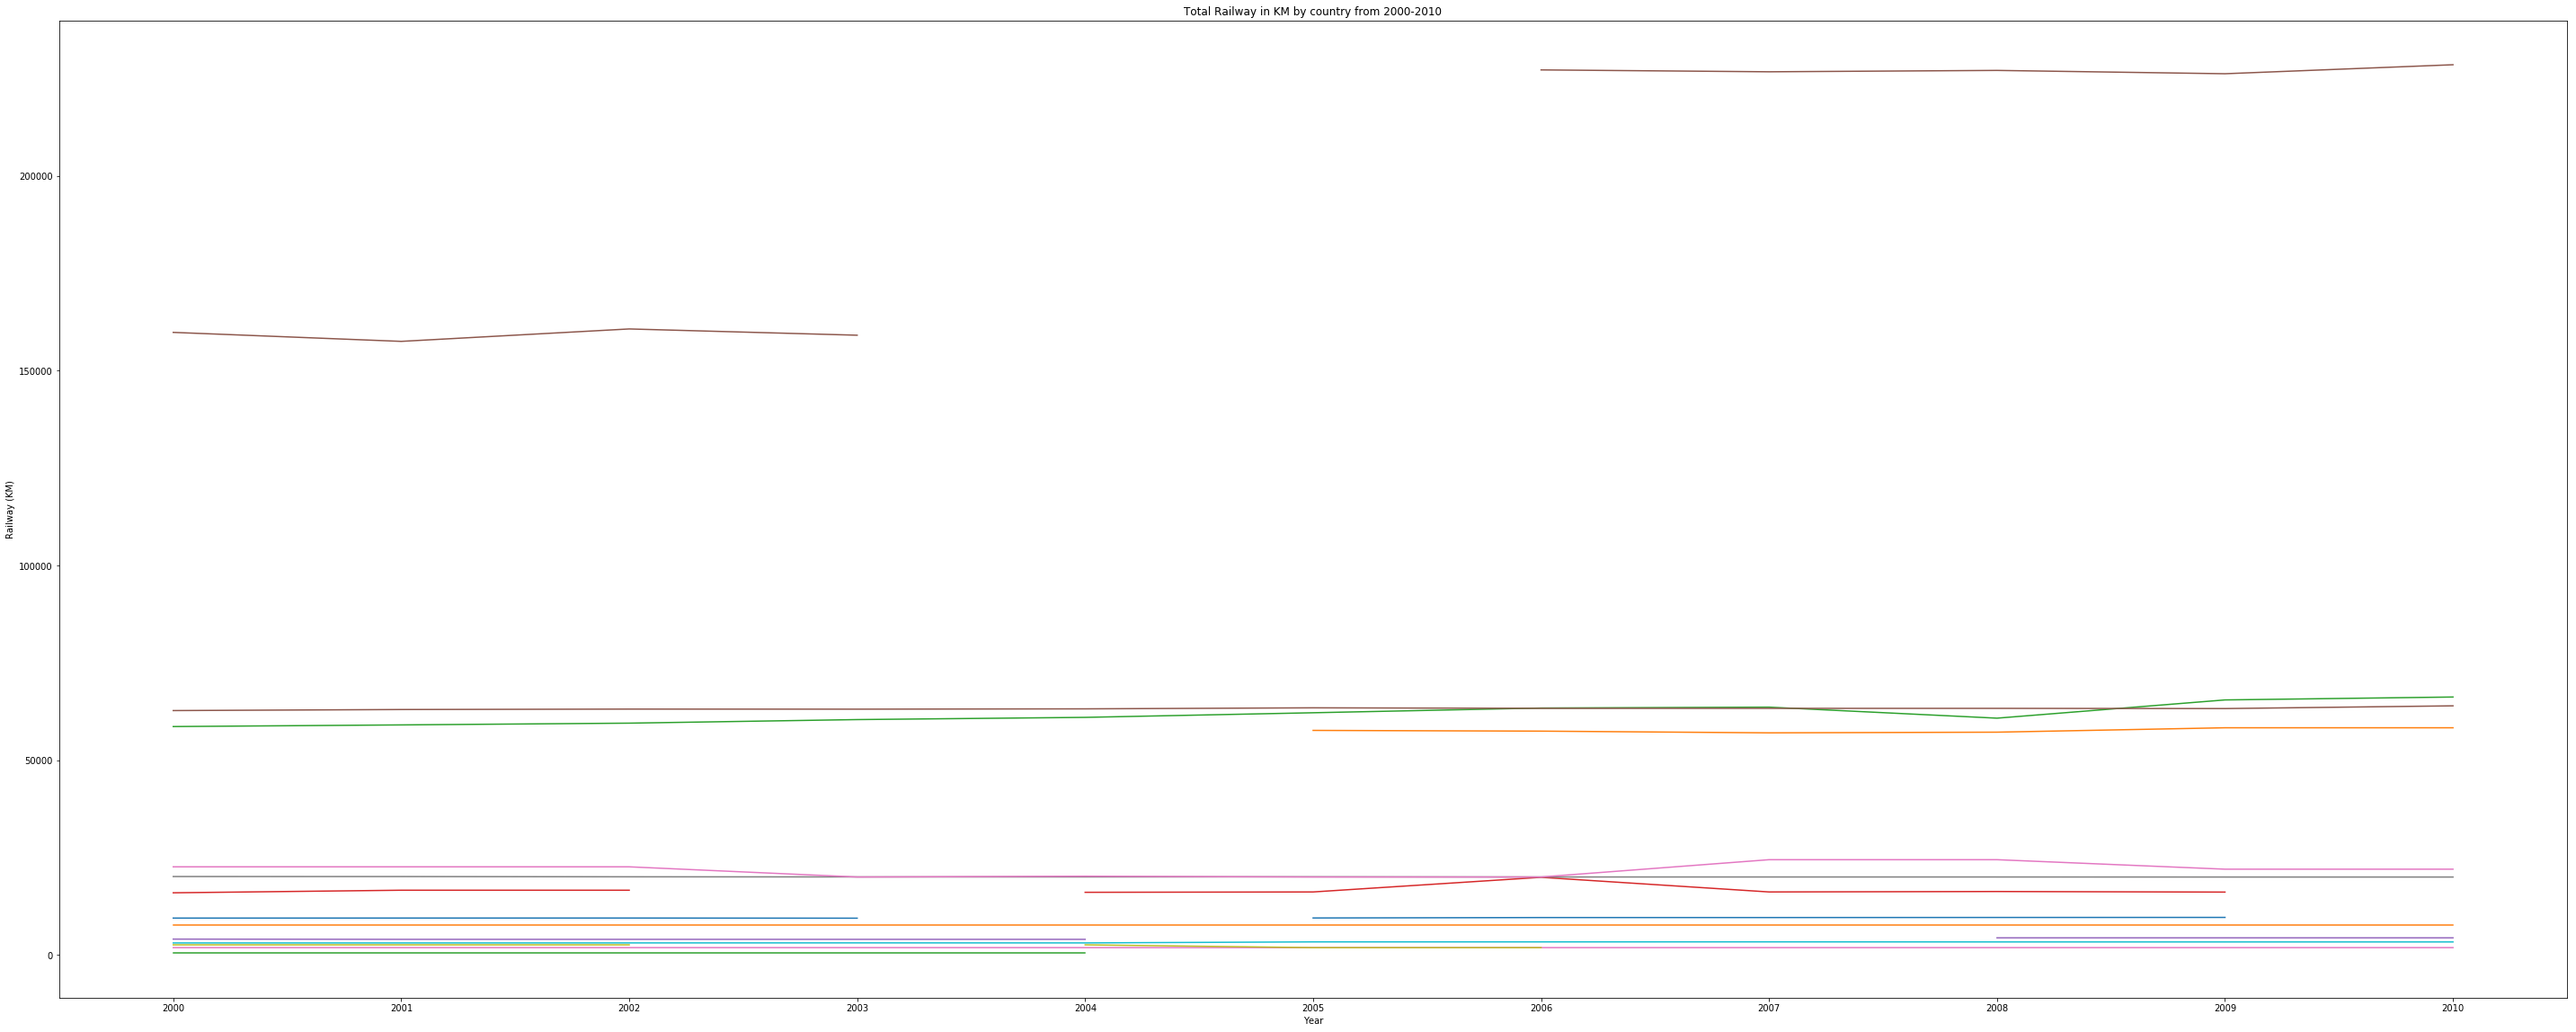

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
11,australia,9499.0,9508.0,9514.0,9474.0,NaN,9528.0,9639.0,9639.0,9661.0,9674.0,NaN
33,canada,NaN,NaN,NaN,NaN,NaN,57671.0,57481.0,57042.0,57216.0,58345.0,58345.0
38,china,58656.0,59079.0,59530.0,60446.0,61015.0,62200.0,63412.0,63637.0,60809.0,65491.0,66239.0
79,united kingdom,15991.0,16652.0,16652.0,NaN,16116.0,16208.0,19966.0,16208.0,16321.0,16173.0,NaN
104,indonesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
rail_df = load_data_frame('wrldbnk_trains.csv', TRANSPORT_DIR)

rail_df = clean_worldbank_data(rail_df)

#select the countries with data from newslookup.com
filtered_df = rail_df.loc[rail_df['Country Name'].isin(SELECTED_COUNTRIES)]

#select from years 2000-2010
dated_df = get_date_range(filtered_df, '2000', '2011')

#transpose for graphing
rail_t = dated_df.T

fig = plt.figure(figsize=(50,20))
ax = fig.add_subplot(1,1,1)
ax.plot(rail_t[1:])
ax.set(title='Total Railway in KM by country from 2000-2010',
 ylabel='Railway (KM)', xlabel='Year')
plt.show()

dated_df.head()

## Airplane departures by Country  

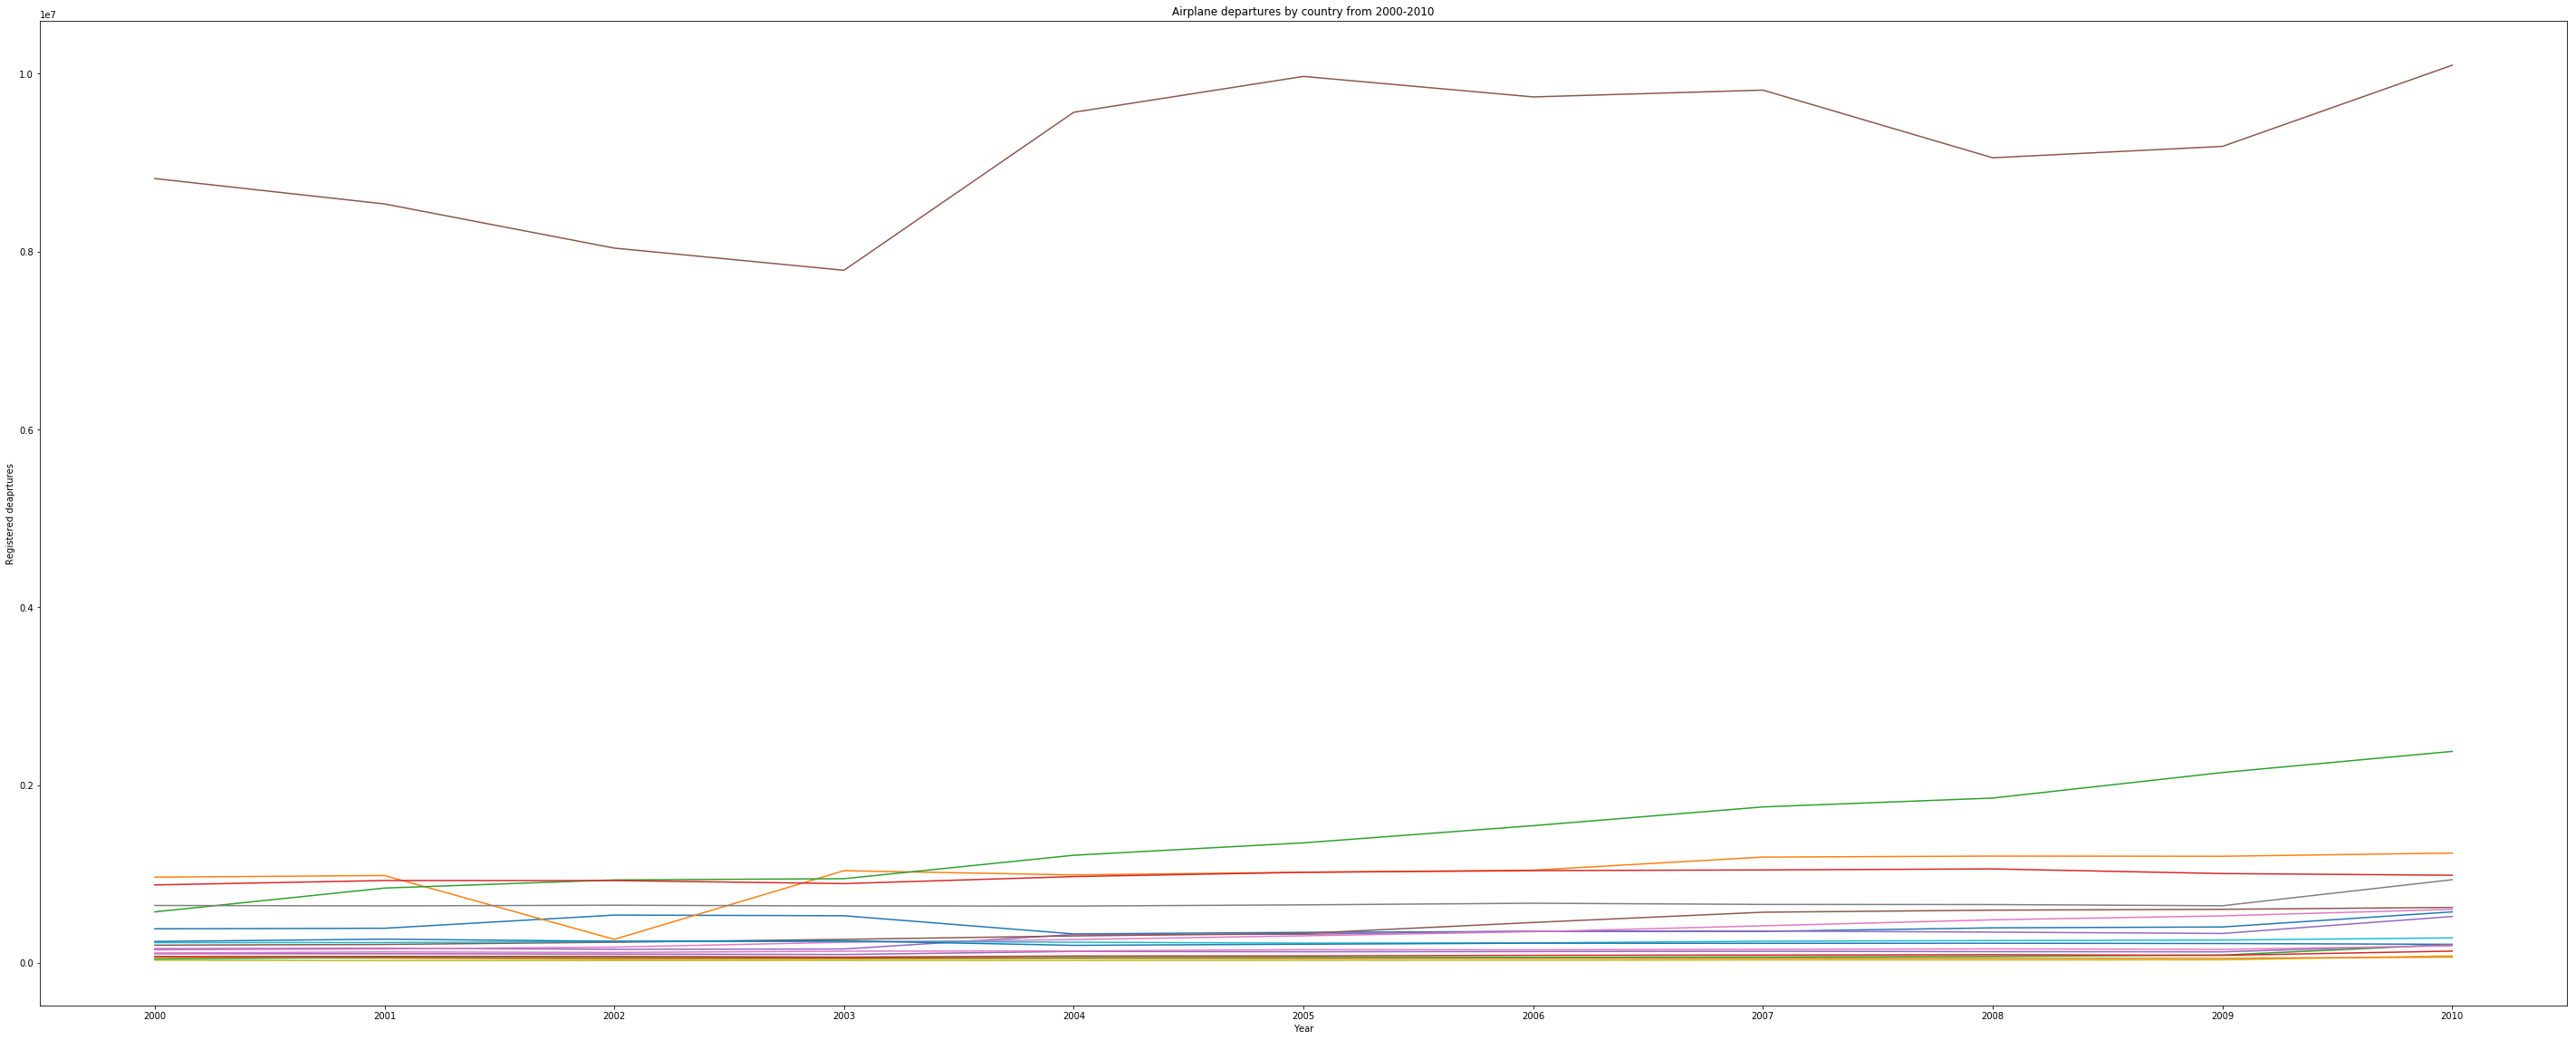

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
11,australia,382514.0,388734.0,536867.0,529648.0,324939.0,342509.0,352909.0,353546.0,393363.0,403256.0,5.729060e+05
33,canada,963468.0,982013.0,263906.0,1036092.0,988755.0,1018480.0,1042100.0,1188947.0,1200361.0,1198381.0,1.234529e+06
38,china,572921.0,840911.0,932064.0,946354.0,1209900.0,1349269.0,1542564.0,1753550.0,1853088.0,2140124.0,2.377789e+06
79,united kingdom,876158.0,925638.0,924944.0,891154.0,970036.0,1018118.0,1037032.0,1044883.0,1056206.0,1003893.0,9.851090e+05
104,indonesia,159027.0,164651.0,152278.0,155609.0,318488.0,320724.0,357414.0,357789.0,345240.0,330112.0,5.209321e+05
107,india,198426.0,206690.0,231413.0,263870.0,302790.0,330484.0,453921.0,569033.0,592292.0,601977.0,6.231968e+05
109,ireland,145457.0,156277.0,177032.0,231296.0,261345.0,303697.0,350204.0,416205.0,483741.0,528098.0,6.012620e+05
117,japan,645087.0,640328.0,647953.0,639866.0,638430.0,651858.0,670252.0,656917.0,655495.0,641913.0,9.344874e+05
119,kenya,29080.0,24741.0,25873.0,27057.0,26218.0,28399.0,29039.0,32329.0,32045.0,33593.0,7.826500e+04
124,"korea, rep.",226910.0,228442.0,238649.0,240942.0,232077.0,221424.0,223735.0,243113.0,250260.0,256160.0,2.804270e+05


In [7]:
air_df = load_data_frame('wrldbnk_planes.csv', TRANSPORT_DIR)

air_df = clean_worldbank_data(air_df)

#select the countries with data from newslookup.com
filtered_df = air_df.loc[air_df['Country Name'].isin(SELECTED_COUNTRIES)]

#select from years 2000-2010
dated_df = get_date_range(filtered_df, '2000', '2011')

#transpose for graphing
air_t = dated_df.T

fig = plt.figure(figsize=(50,20))
ax = fig.add_subplot(1,1,1)
ax.plot(air_t[1:])
ax.set(title='Airplane departures by country from 2000-2010',
 ylabel='Registered deaprtures', xlabel='Year')
plt.show()

dated_df.head(17)